<h1><center>'Mini Project 01'</center></h1>

Objectives:
   1. Generating Data with noise.
   2. Plottng single file data with best fit curves.
   3. Multiple File Handling.

## 1. Genearting Data with noise: 

### Example 01-

In [39]:
#importing required libraries and modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

<function matplotlib.pyplot.show(close=None, block=None)>

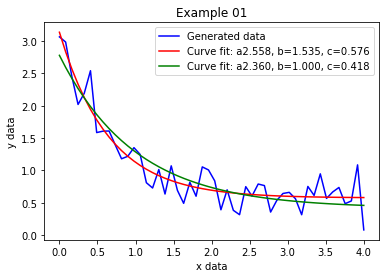

In [40]:
#Steps for generating data (with noise) and plotting it with curve fit:
#Step 1- Generating clean data:
x_data = np.linspace(0, 4, 50)

rng = np.random.default_rng()


# Step 2- Defining function for distribution:
def func(x,a,b,c):
    return (a*np.exp(-b*x) + c)

y = func(x_data, 2.5, 1.3, 0.5)
# Adding noise to the data:
y_noise = 0.2 * rng.normal(size=x_data.size)
y_data = y + y_noise


#Step 3- Plotting oringinal data (blue):
plt.plot(x_data, y_data, 'b-', label= 'Generated data')


#Step 4- Executing curve_fit on noise data (Red) and plotting it.:
popt, pcov = curve_fit(func, x_data, y_data)
plt.plot(x_data, func(x_data, *popt), 'r-', label = "Curve fit: a%5.3f, b=%5.3f, c=%5.3f" % tuple(popt)) 

#Executing curve_fit on noise data with bounds (green):
popt, pcov = curve_fit(func, x_data, y_data, bounds= (0, [3.0,1.0,0.5]))
plt.plot(x_data, func(x_data, *popt), 'g-', label = "Curve fit: a%5.3f, b=%5.3f, c=%5.3f" % tuple(popt))

#Adding title, labels and legends to the plot:
plt.title("Example 01")
plt.xlabel('x data')
plt.ylabel('y data')
plt.legend()
plt.show



### Example 02 (Gaussian Curve fit):

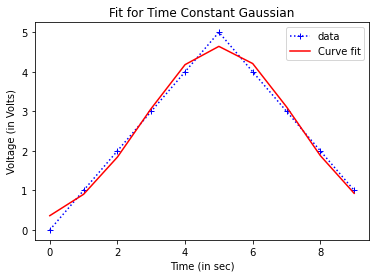

In [41]:
#Step 1- Generating clean data:
xd = np.arange(10)
yd = np.array([0,1,2,3,4,5,4,3,2,1])

mean = sum(xd * yd) / sum(yd)
sigma = np.sqrt(sum(yd*(xd-mean)**2)/ sum(yd))

# Step 2- Defining function for Gaussian distribution:
def gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))
    

#Step 3- Plotting oringinal data (blue):
plt.plot(xd, yd, 'b+:', label='data')


#Step 4- Executing curve_fit on noise data (Red) and plotting it:
popt,pcov = curve_fit(Gauss, xd, yd, p0=[max(yd), mean, sigma])
plt.plot(xd, gauss(xd, *popt), 'r-', label='Curve fit')


#Adding title, labels and legends to the plot:
plt.title("Fit for Time Constant Gaussian")
plt.xlabel('Time (in sec)')
plt.ylabel('Voltage (in Volts)')
plt.legend()
plt.show()



### 2. Plotting Single file with best fit curves:

In [42]:
#We imported required libraries already.

### Example 01-

In [43]:
#loading the dataset:
data = np.loadtxt("file_1.txt")
x,y = data[:, 0], data[:, 1]

In [44]:
print(data)

[[ 2.760e+02 -2.000e-01]
 [ 2.770e+02 -1.700e+00]
 [ 2.780e+02 -1.900e+00]
 [ 2.790e+02 -1.700e+00]
 [ 2.800e+02 -7.000e-01]
 [ 2.810e+02 -1.500e+00]
 [ 2.820e+02 -5.000e-01]
 [ 2.830e+02  0.000e+00]
 [ 2.840e+02  5.000e-01]
 [ 2.850e+02  2.000e-01]
 [ 2.860e+02  1.000e+00]
 [ 2.870e+02  5.000e-01]
 [ 2.880e+02 -7.000e-01]
 [ 2.890e+02 -1.500e+00]
 [ 2.900e+02 -2.000e-01]
 [ 2.910e+02  0.000e+00]
 [ 2.920e+02 -2.000e-01]
 [ 2.930e+02 -5.000e-01]
 [ 2.940e+02 -1.500e+00]
 [ 2.950e+02 -1.200e+00]
 [ 2.960e+02  0.000e+00]
 [ 2.970e+02 -1.500e+00]
 [ 2.980e+02 -2.000e-01]
 [ 2.990e+02 -5.000e-01]
 [ 3.000e+02 -2.200e+00]
 [ 3.010e+02 -2.000e-01]
 [ 3.020e+02 -1.200e+00]
 [ 3.030e+02 -1.000e+00]
 [ 3.040e+02 -1.700e+00]
 [ 3.050e+02 -1.000e+00]
 [ 3.060e+02 -5.000e-01]
 [ 3.070e+02  0.000e+00]
 [ 3.080e+02 -1.500e+00]
 [ 3.090e+02 -2.000e-01]
 [ 3.100e+02 -5.000e-01]
 [ 3.110e+02 -1.200e+00]
 [ 3.120e+02 -1.700e+00]
 [ 3.130e+02  0.000e+00]
 [ 3.140e+02 -1.000e+00]
 [ 3.150e+02 -1.200e+00]


In [45]:
#Defining function for distribution:
def lognorm(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma*x)*np.exp(-((np.log(x)-mu)**2)/(2*sigma**2))

popt, _ = curve_fit(lognorm, x, y)
mu, sigma = popt

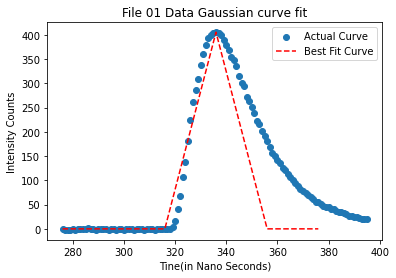

In [46]:
#Plotting oringinal data (blue):
plt.scatter(x,y)

# define a sequence of inputs between the smallest and largest known inputs for more uniform graph:
x_line= np.arange(min(x), max(x), 20)
y_line= lognorm(x_line, mu, sigma)

# create a line plot for the mapping function and plotting it.(red):
plt.plot(x_line, y_line, '--', color='red')

#Adding title, labels and legends to the plot:
plt.title("File 01 Data Gaussian curve fit")
plt.legend(['Actual Curve', "Best Fit Curve"], loc= "best")
plt.xlabel('Tine(in Nano Seconds)')
plt.ylabel('Intensity Counts')
plt.show()

### Example 02 (Plotting text file data with Gaussian fitting curves)-

In [47]:
#loading the dataset:
data2 = np.loadtxt("file_2.txt")
x,y = data2[:, 0], data2[:, 1]

In [48]:
print(data2)

[[ 2.800e+02 -1.400e+00]
 [ 2.810e+02 -2.200e+00]
 [ 2.820e+02 -2.900e+00]
 [ 2.830e+02 -1.900e+00]
 [ 2.840e+02 -1.400e+00]
 [ 2.850e+02 -9.000e-01]
 [ 2.860e+02 -2.900e+00]
 [ 2.870e+02 -1.200e+00]
 [ 2.880e+02 -1.900e+00]
 [ 2.890e+02 -1.400e+00]
 [ 2.900e+02 -2.400e+00]
 [ 2.910e+02 -2.400e+00]
 [ 2.920e+02 -1.200e+00]
 [ 2.930e+02 -2.400e+00]
 [ 2.940e+02 -1.200e+00]
 [ 2.950e+02 -2.400e+00]
 [ 2.960e+02 -1.200e+00]
 [ 2.970e+02 -1.200e+00]
 [ 2.980e+02 -1.700e+00]
 [ 2.990e+02 -1.400e+00]
 [ 3.000e+02 -2.200e+00]
 [ 3.010e+02 -1.900e+00]
 [ 3.020e+02 -1.200e+00]
 [ 3.030e+02 -1.900e+00]
 [ 3.040e+02 -1.900e+00]
 [ 3.050e+02 -2.900e+00]
 [ 3.060e+02 -2.400e+00]
 [ 3.070e+02 -3.900e+00]
 [ 3.080e+02 -9.000e-01]
 [ 3.090e+02 -2.200e+00]
 [ 3.100e+02 -1.700e+00]
 [ 3.110e+02 -1.900e+00]
 [ 3.120e+02 -1.400e+00]
 [ 3.130e+02 -2.400e+00]
 [ 3.140e+02 -1.900e+00]
 [ 3.150e+02 -2.200e+00]
 [ 3.160e+02 -1.200e+00]
 [ 3.170e+02 -2.200e+00]
 [ 3.180e+02 -1.700e+00]
 [ 3.190e+02 -3.100e+00]


In [50]:
#Defining function for Gaussian distribution:
def gauss(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

x1 =np.array(x)
n = len(x1)
mean = sum(x * y) / sum(y)
sigma = np.sqrt(sum(y*(x-mean)**2)/ sum(y))
print(mean, sigma)

popt,pcov = curve_fit(gauss, x, y, p0=[1, mean, sigma])

347.54728501514813 14.06136264150522


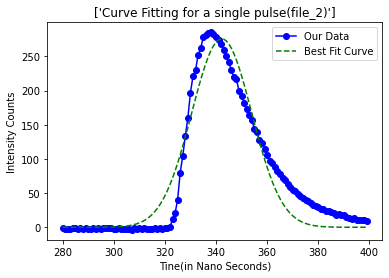

In [51]:
#Plotting oringinal data (Ocean blue):
plt.plot(x,y, '-ob', label = 'Our Data')

# create a line plot for the mapping function (green) and plotting it.:
plt.plot(x, gauss(x, *popt), 'g--', label='Best Fit Curve' )

#Adding title,labels and legends to the plot:
plt.title(['Curve Fitting for a single pulse(file_2)'])
plt.xlabel('Tine(in Nano Seconds)')
plt.ylabel('Intensity Counts')
plt.legend()
plt.show()

### 3. Multiple File Handling:

In [52]:
pwd

'C:\\Users\\Vaishanavi'

In [53]:
#Creating 2 empty listes to store the data of 2 different columns which we are going to read from the all files.
x_list = list()
y_list = list()

#Creating empty list to store the names of the files:
file_name = list()


for i in range (0, 101):
    file_name.append('file_'+str(i)+'.txt')
    
for a in file_name:
    temp= list()
    for b in open(a):
        temp=b.split()
        x_list.append(float(temp[0]))
        y_list.append(float(temp[1]))

for i in range (0, len(x_list)-1):
    smallest = i 
    for j in range(i+1, len(x_list)):
        if x_list[j]<x_list[smallest]:
            smallest = j
        
x_list[i], x_list[smallest] = x_list[smallest], x_list[i]
y_list[i], y_list[smallest] = y_list[smallest], y_list[i]

print(x_list)
print(y_list)    
print()


[264.0, 265.0, 266.0, 267.0, 268.0, 269.0, 270.0, 271.0, 272.0, 273.0, 274.0, 275.0, 276.0, 277.0, 278.0, 279.0, 280.0, 281.0, 282.0, 283.0, 284.0, 285.0, 286.0, 287.0, 288.0, 289.0, 290.0, 291.0, 292.0, 293.0, 294.0, 295.0, 296.0, 297.0, 298.0, 299.0, 300.0, 301.0, 302.0, 303.0, 304.0, 305.0, 306.0, 307.0, 308.0, 309.0, 310.0, 311.0, 312.0, 313.0, 314.0, 315.0, 316.0, 317.0, 318.0, 319.0, 320.0, 321.0, 322.0, 323.0, 324.0, 325.0, 326.0, 327.0, 328.0, 329.0, 330.0, 331.0, 332.0, 333.0, 334.0, 335.0, 336.0, 337.0, 338.0, 339.0, 340.0, 341.0, 342.0, 343.0, 344.0, 345.0, 346.0, 347.0, 348.0, 349.0, 350.0, 351.0, 352.0, 353.0, 354.0, 355.0, 356.0, 357.0, 358.0, 359.0, 360.0, 361.0, 362.0, 363.0, 364.0, 365.0, 366.0, 367.0, 368.0, 369.0, 370.0, 371.0, 372.0, 373.0, 374.0, 375.0, 376.0, 377.0, 378.0, 379.0, 380.0, 381.0, 382.0, 383.0, 276.0, 277.0, 278.0, 279.0, 280.0, 281.0, 282.0, 283.0, 284.0, 285.0, 286.0, 287.0, 288.0, 289.0, 290.0, 291.0, 292.0, 293.0, 294.0, 295.0, 296.0, 297.0, 298.0

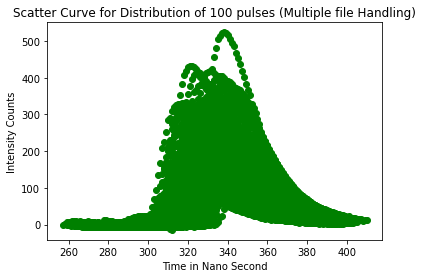

In [54]:
#Plotting entire data (Green):
plt.scatter(x_list, y_list, color='green')

#Adding title, labels and title to the plot:
plt.title('Scatter Curve for Distribution of 100 pulses (Multiple file Handling)')
plt.xlabel("Time in Nano Second")
plt.ylabel("Intensity Counts")
plt.show()

### Conclusion:

1. 4 steps for curve fitting of and distribtution or data-
     1. Generating or importing data.
     2. Defining function for the distribution.
     3. Plotting oringinal data.
     4. Executing curve fit on the data and plotting it.
  
2. We use the function curve_fit from the python module scipy.optimize to fit our data. It uses non-linear least squares to fit    data to a functional form. One can learn more about curve_fit by using the help function within the Jupyter notebook or        scipy online documentation.
      The curve_fit function has three required inputs: the function you want to fit, the x-data, and the y-data you fit. There    are two outputs. The first is an array of the optimal values of the parameters. The second is a matrix of the estimated        covariance of the parameters from which you can calculate the standard error for the parameters.

3. We use for loop for mutiple file handling. Alos we used "for loop" for sorting and arranging data in order and avoid            scatterness of the plot.

4. Adding titles, labels and legends in the plot makes the plot more attractive and presentable.


<h2><center>Thank you!!!</center></h2>